<div class="usecase-title">Social Indicator Changes</div>

<div class="usecase-authors"><b>Authored by: </b> Thomas Rostov</div>

<div class="usecase-duration"><b>Duration:</b> {90} mins</div>

<div class="usecase-level-skill">
    <div class="usecase-level"><b>Level: </b>{Intermediate}</div>
    <div class="usecase-skill"><b>Pre-requisite Skills: </b>{Python, and add any more skills needed}</div>
</div>

<div class="usecase-section-header">Scenario</div>

{Using User Story format, write a description of the problem you are trying to solve for this use case.}

<div class="usecase-section-header">What this use case will teach you</div>

At the end of this use case you will:
- {list the skills demonstrated in your use case}

<div class="usecase-section-header">{Heading for introduction or background relating to problem}</div>

{Write your introduction here. Keep it concise. We're not after "War and Peace" but enough background information to inform the reader on the rationale for solving this problem or background non-technical information that helps explain the approach. You may also wish to give information on the datasets, particularly how to source those not being imported from the client's open data portal.}



### Importing Libraries and Data

In [35]:
#Importing libraries
import requests
import statistics
import numpy as np
import pandas as pd
import ipywidgets as widgets
import matplotlib.pyplot as plt
from io import StringIO

In [36]:
# def collect_data(dataset_id):
#     base_url = "https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/"
#     apikey = 
#     dataset_id = dataset_id
#     format = 'csv'

#     url = f'{base_url}{dataset_id}/exports/{format}'
#     params = {
#         'select': '*',
#         'limit': -1,  # all records
#         'lang': 'en',
#         'timezone': 'Australia/Melbourne',
#         'api_key': apikey  # use if use datasets API_key permissions
#     }

#     response = requests.get(url, params=params)

#     if response.status_code == 200:
#         # StringIO to read the CSV data
#         url_content = response.content.decode('utf-8')
#         dataset = pd.read_csv(StringIO(url_content), delimiter=';')
#         return dataset
#     else:
#         print(f'Request failed with status code {response.status_code}')
        
# data_2018 = collect_data('social-indicators-for-city-of-melbourne-residents-2018')
# data_2019 = collect_data('social-indicators-for-city-of-melbourne-residents-2019')
# data_2020 = collect_data('social-indicators-for-city-of-melbourne-residents-2020')
# data_2021 = collect_data('social-indicators-for-city-of-melbourne-residents-2021')
# data_2022 = collect_data('social-indicators-for-city-of-melbourne-residents-2022')
# data_2023 = collect_data('social-indicators-for-city-of-melbourne-residents-2023')
# data_2012_2016 = collect_data('indicators-of-wellbeing-by-year-future-melbourne')

In [37]:
#Importation of datasets (Downloaded)
data_2018 = pd.read_csv('social-indicators-for-city-of-melbourne-residents-2018.csv')
data_2019 = pd.read_csv('social-indicators-for-city-of-melbourne-residents-2019.csv')
data_2020 = pd.read_csv('social-indicators-for-city-of-melbourne-residents-2020.csv')
data_2021 = pd.read_csv('social-indicators-for-city-of-melbourne-residents-2021.csv')
data_2022 = pd.read_csv('social-indicators-for-city-of-melbourne-residents-2022.csv')
data_2023 = pd.read_csv('social-indicators-for-city-of-melbourne-residents-2023.csv')
data_2012_2016 = pd.read_csv('indicators-of-wellbeing-by-year-future-melbourne.csv')

### Data Cleaning

In [38]:
#replacing with proper respondent group format
data_2020['RESPONDENT GROUP'] = data_2020['RESPONDENT GROUP'].replace('18-24', '18-24 years')
data_2020['RESPONDENT GROUP'] = data_2020['RESPONDENT GROUP'].replace('25-34', '25-34 years')
data_2020['RESPONDENT GROUP'] = data_2020['RESPONDENT GROUP'].replace('35-44', '35-44 years')
data_2020['RESPONDENT GROUP'] = data_2020['RESPONDENT GROUP'].replace('45-54', '45-54 years')
data_2020['RESPONDENT GROUP'] = data_2020['RESPONDENT GROUP'].replace('55-64', '55-64 years')
data_2020['RESPONDENT GROUP'] = data_2020['RESPONDENT GROUP'].replace('65+', '65+ years')

In [39]:
#Changing the 2018 dataframe to have averages be 0-100 instead of 0-10 to match the other datasets
average_rows = data_2018['RESPONSE'] == 'Average satisfaction score (from 0-10)'
data_2018.loc[average_rows, 'RESULT'] = data_2018.loc[average_rows, 'RESULT'] * 10

In [40]:
#Determing what indicators are shared between the 2018 - 2023 datasets 
unique_list = data_2018['DESCRIPTION'].unique()
common_list = []

unique_2019 = data_2019['DESCRIPTION'].unique()
unique_2020 = data_2020['DESCRIPTION'].unique()
unique_2021 = data_2021['DESCRIPTION'].unique()
unique_2022 = data_2022['DESCRIPTION'].unique()
unique_2023 = data_2023['DESCRIPTION'].unique()

for i in unique_list:
    if i in unique_2019 and i in unique_2020 and i in unique_2021 and i in unique_2022 and i in unique_2023:
        common_list.append(i)

In [41]:
#List to differentiate percentage or average score
average_or_percentage_r = []
for i in common_list:
    average_or_percentage_r.append(data_2018[data_2018['DESCRIPTION'] == i]['FORMAT'].unique()[0])
    
average_or_percentage = ['Percentage' if x == 'Per cent' else 'Average (out of 100)' if x == 'Average' else x for x in average_or_percentage_r]

In [42]:
#creating a DF list for easy DF iteration
df_list = [data_2018, data_2019, data_2020, data_2021, data_2022, data_2023]

### Interactive Visualization

In [43]:
#Function to create a plot for comparing male and female results
def update_plot(input_num):
    num = input_num

    year_list = [2018, 2019, 2020, 2021, 2022, 2023]
    male_list = []
    female_list = []

    for df in df_list:
        male_list.append(df[(df['DESCRIPTION'] == common_list[num]) & (df['RESPONDENT GROUP'] == 'Male')]['RESULT'].iloc[0])
        female_list.append(df[(df['DESCRIPTION'] == common_list[num]) & (df['RESPONDENT GROUP'] == 'Female')]['RESULT'].iloc[0])
        
    yoffset = 15
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    axs[0].plot(year_list, male_list)
    axs[0].set_title('Males')
    axs[0].set_xlabel('Year')
    axs[0].set_ylabel(average_or_percentage[num])
    axs[0].grid(True)
    axs[0].set_ylim(min(male_list) - yoffset, max(male_list) + yoffset)

    axs[1].plot(year_list, female_list)
    axs[1].set_title('Females')
    axs[1].set_xlabel('Year')
    axs[1].set_ylabel(average_or_percentage[num])
    axs[1].grid(True)
    axs[1].set_ylim(min(female_list) - yoffset, max(female_list) + yoffset)

    if average_or_percentage[num] == 'Percentage':
        fig.suptitle('Percentage of people who ' + common_list[num], fontsize=16, y=1, x=0.5)
    if average_or_percentage[num] == 'Average (out of 100)':
        fig.suptitle('Average score for ' + common_list[num], fontsize=16, y=1, x=0.5)

    plt.show()

In [44]:
#Creating a widget selection
dropdown_options = widgets.Dropdown(
    options=common_list,
    value='Participate in adequate physical activity',
    description='Select the metric to compare',
    disabled=False,
    layout=widgets.Layout(width='700px'),
    style={'description_width': 'initial'}
)

In [45]:
#Widget logic
def on_button_click(a):
    plot_input = common_list.index(dropdown_options.value)
    update_plot(plot_input)

button = widgets.Button(description="Create Graphs")
button.on_click(on_button_click)

display(widgets.HBox([dropdown_options]))
display(button)

Button(description='Create Graphs', style=ButtonStyle())

### Analysis Regarding Impact Of Covid

In [46]:
#Below I have selected what I believe to be interesting results regarding the impact of covid on various social indicators. 
#other indicators have been primarily excluded due to being too choppy (no trend).

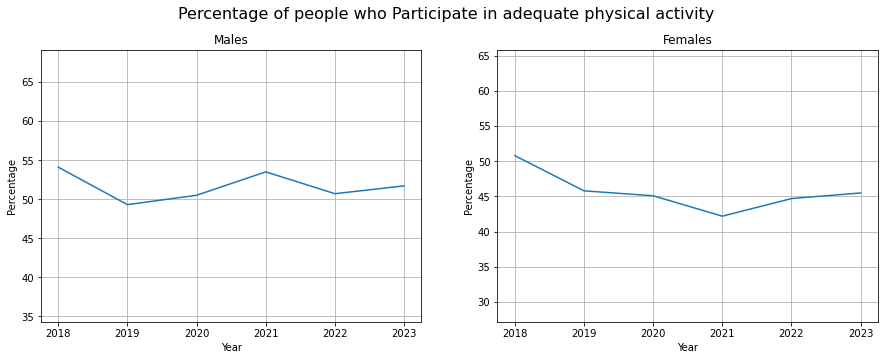

Placeholder


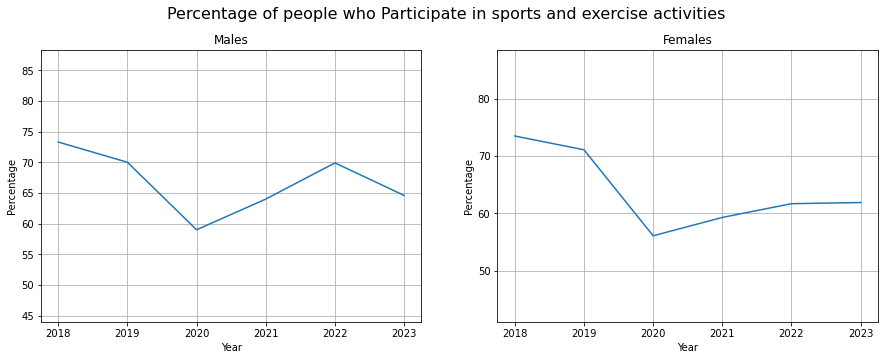

Placeholder


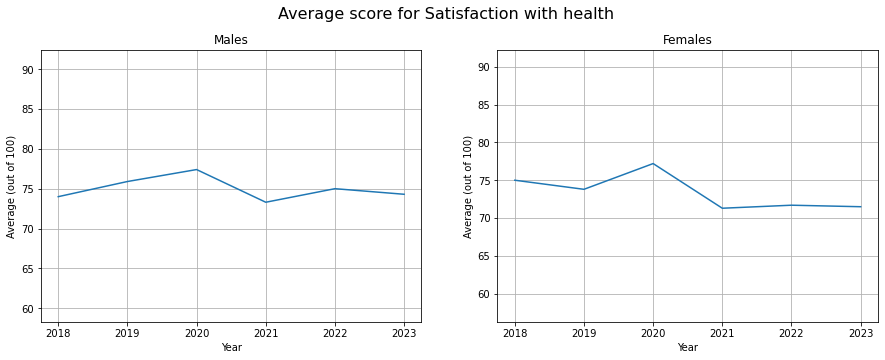

Placeholder


In [47]:
#Exercise/Health Indicators
update_plot(0) 
print('Placeholder')
update_plot(1) 
print('Placeholder')
update_plot(13) 
print('Placeholder')

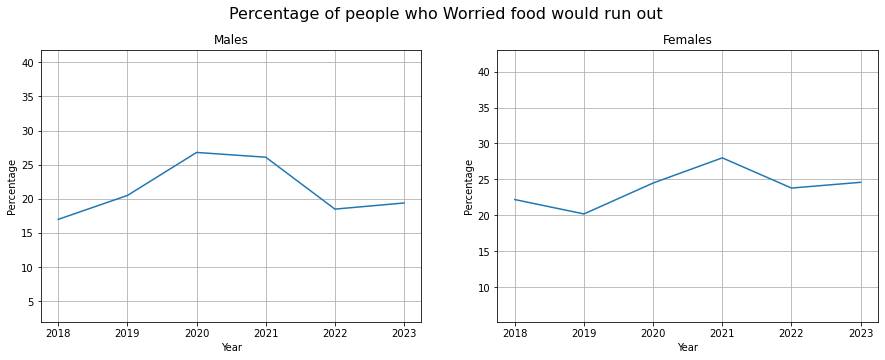

Placeholder


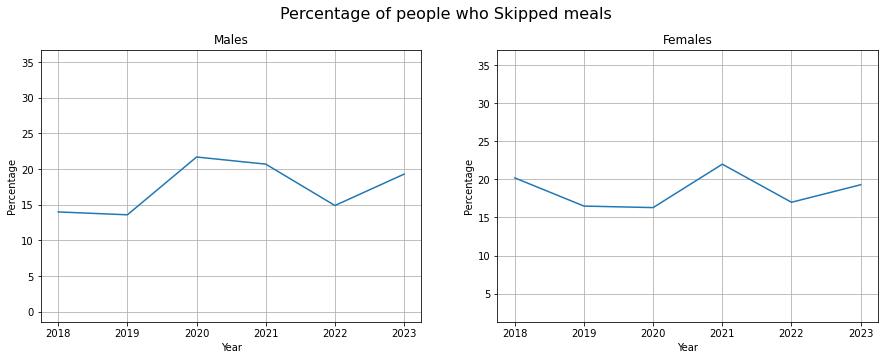

Placeholder


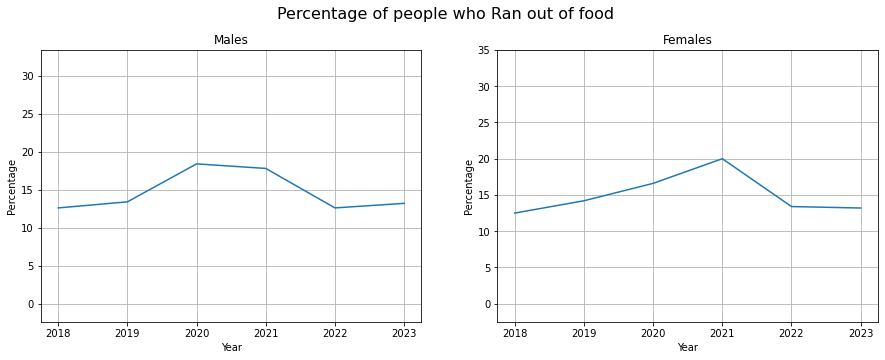

Placeholder


In [48]:
#Food Security Indicators
update_plot(4) 
print('Placeholder')
update_plot(5) 
print('Placeholder')
update_plot(6) 
print('Placeholder')

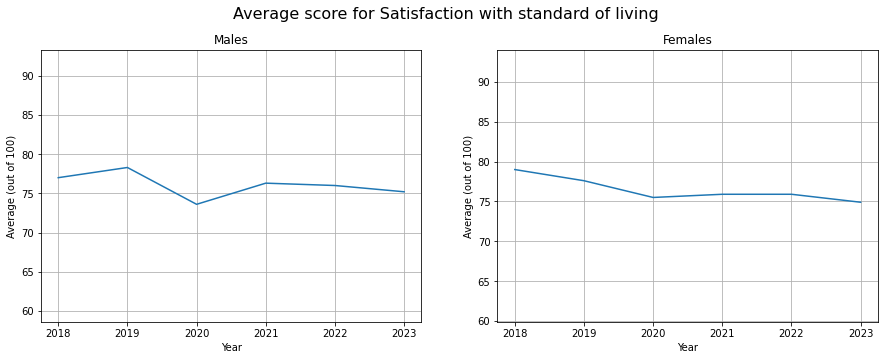

Placeholder


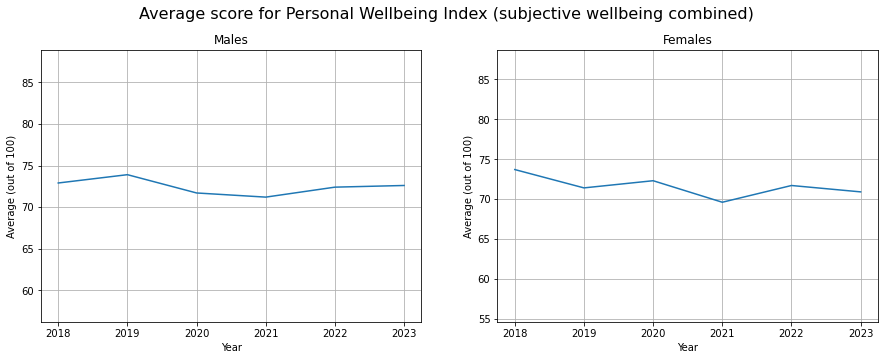

Placeholder


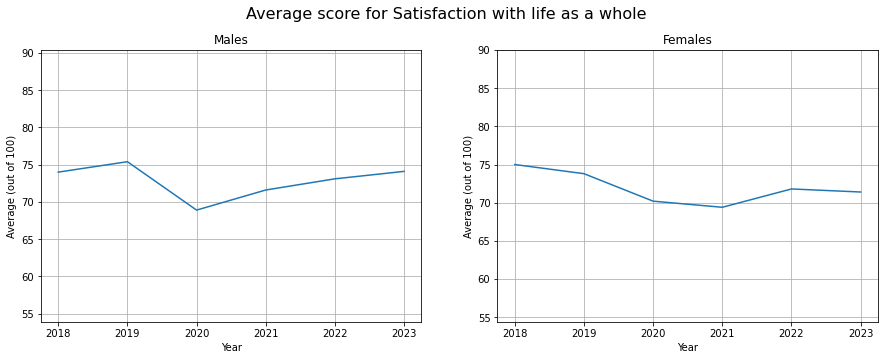

Placeholder


In [49]:
#General Life Satisfaction Indicators
update_plot(12) 
print('Placeholder')
update_plot(19) 
print('Placeholder')
update_plot(20) 
print('Placeholder')

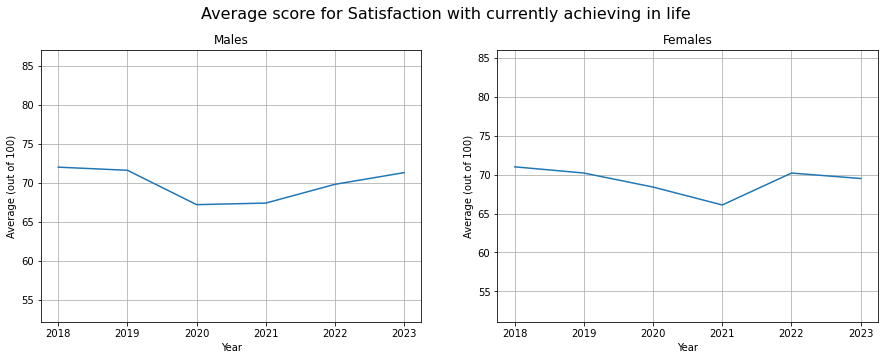

Placeholder


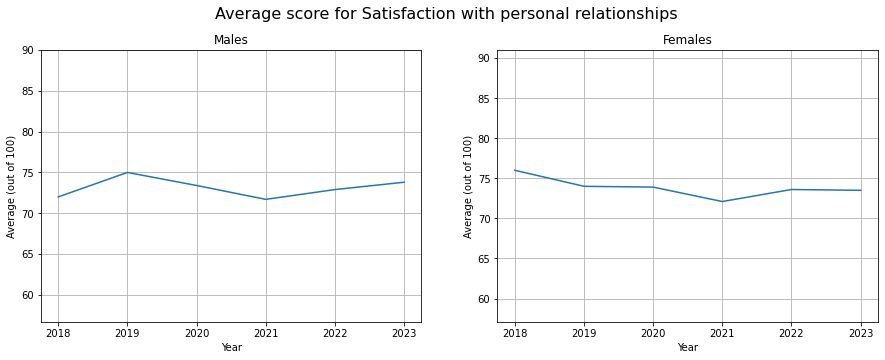

Placeholder


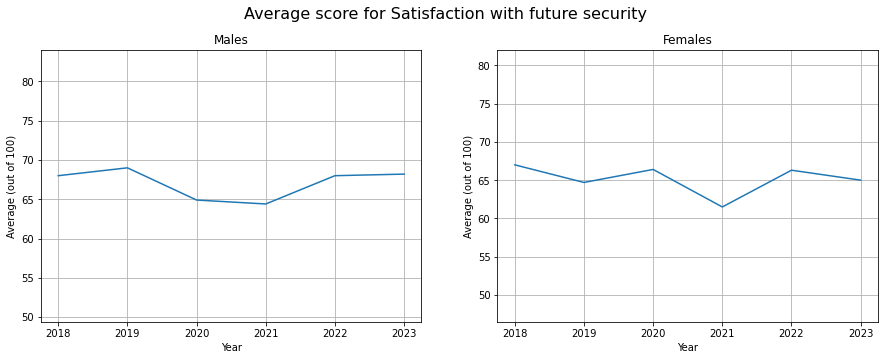

Placeholder


In [50]:
#More Specific Life Satisfaction Indicators
update_plot(14)
print('Placeholder')
update_plot(15) 
print('Placeholder')
update_plot(18) 
print('Placeholder')

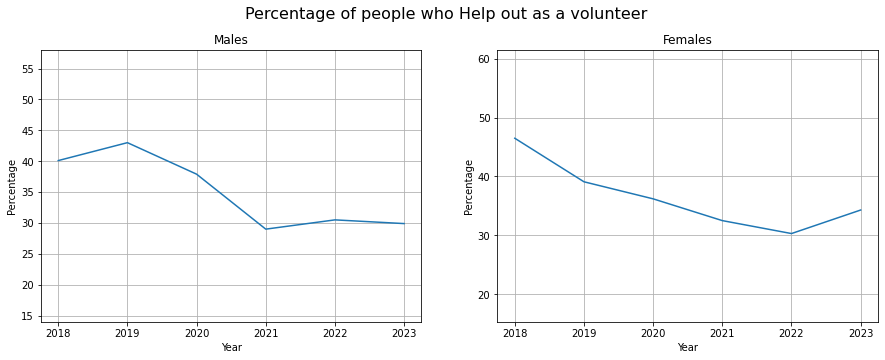

Placeholder


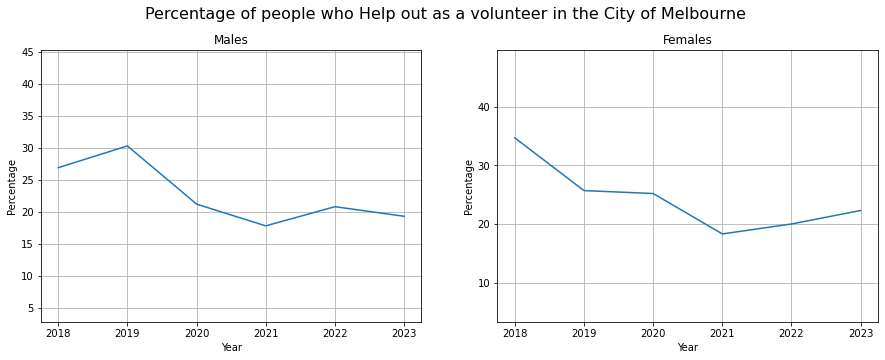

Placeholder


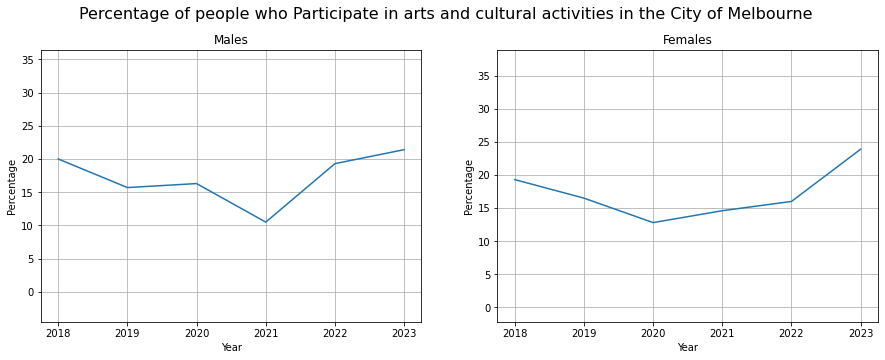

Placeholder


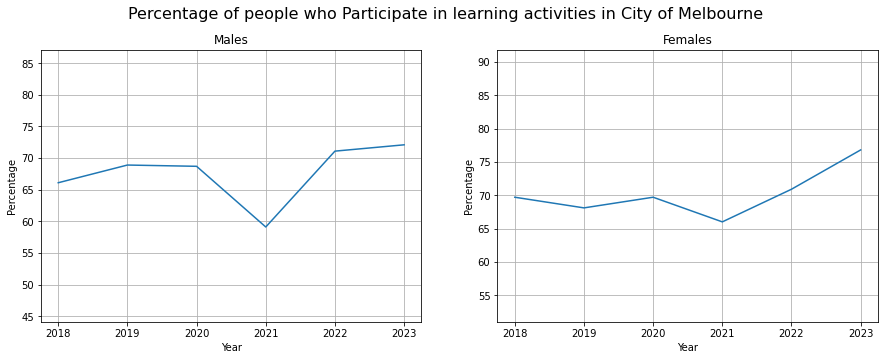

Placeholder


In [51]:
#Community Participation Indicators
update_plot(10)
print('Placeholder')
update_plot(22) 
print('Placeholder')
update_plot(23)
print('Placeholder')
update_plot(24) 
print('Placeholder')

## Averaging Out Data By Year and Grouping by Respondent Group

In [52]:
#Determining unique respondent groups
unique_groups_r = data_2018[data_2018['DESCRIPTION'] == 'Participate in adequate physical activity']['RESPONDENT GROUP'].unique()
unique_2019 = data_2019[data_2019['DESCRIPTION'] == 'Participate in adequate physical activity']['RESPONDENT GROUP'].unique()
unique_2020 = data_2020[data_2020['DESCRIPTION'] == 'Participate in adequate physical activity']['RESPONDENT GROUP'].unique()
unique_2021 = data_2021[data_2021['DESCRIPTION'] == 'Participate in adequate physical activity']['RESPONDENT GROUP'].unique()
unique_2022 = data_2022[data_2022['DESCRIPTION'] == 'Participate in adequate physical activity']['RESPONDENT GROUP'].unique()
unique_2023 = data_2023[data_2023['DESCRIPTION'] == 'Participate in adequate physical activity']['RESPONDENT GROUP'].unique()
unique_groups = []

for i in unique_groups_r:
    if i in unique_2019 and i in unique_2020 and i in unique_2021 and i in unique_2022 and i in unique_2023:
        unique_groups.append(i)

In [53]:
#creates a dataframe with the averages of each result (2018-2023) for a specific respondent group and indicator 
df_list = [data_2018, data_2019, data_2020, data_2021, data_2022, data_2023]
df_list_form = []
average = 0

for i in range(len(common_list)):
    for x in unique_groups:
        list_of_results = [] 
        for df in df_list:
            res = df[(df['DESCRIPTION'] == common_list[i]) & (df['RESPONDENT GROUP'] == x)]['RESULT'].iloc[0]
            list_of_results.append(res)
        average = statistics.mean(list_of_results)
        df_list_form.append([common_list[i], x, average])
        average = 0
        
data_averages = pd.DataFrame(df_list_form, columns=['DESCRIPTION', 'RESPONDENT GROUP', 'RESULT'])

In [54]:
#seperating into age, area and gender
listage = ['18-24 years', '25-34 years', '35-44 years', '45-54 years', '55-64 years', '65+ years']
data_age = data_averages[data_averages['RESPONDENT GROUP'].isin(listage)].copy()
listarea = ['East Melbourne 3002', 'Melbourne 3000', 'Docklands 3008', 'City of Melbourne', 'Carlton 3053', 'North Melbourne 3051 / West Melbourne 3003', 'Parkville 3052']
data_area = data_averages[data_averages['RESPONDENT GROUP'].isin(listarea)].copy()
listgender = ['Male', 'Female']
data_gender = data_averages[data_averages['RESPONDENT GROUP'].isin(listgender)].copy()

In [55]:
#sorts to ensure age is in desired order
respondent_order = ['18-24 years', '25-34 years', '35-44 years', '45-54 years', '55-64 years', '65+ years']
data_age['RESPONDENT GROUP'] = pd.Categorical(data_age['RESPONDENT GROUP'], categories = respondent_order, ordered=True)
data_age = data_age.sort_values(by = ['DESCRIPTION', 'RESPONDENT GROUP'])

In [56]:
#replacing an unecessarily long data area category
data_area['RESPONDENT GROUP'] = data_area['RESPONDENT GROUP'].replace({'North Melbourne 3051 / West Melbourne 3003':'N/W Melb 3015/3003'})

### Plotting Bar Graphs to Compare Groups

In [57]:
#creates a barchart to plot a specific indicator against a dataframe
def create_barchart(num, df):
    x_b = df[df['DESCRIPTION'] == common_list[num]]['RESPONDENT GROUP'].tolist()
    y_b = df[df['DESCRIPTION'] == common_list[num]]['RESULT'].tolist()
    
    plt.bar(x_b, y_b)
    plt.xticks(rotation=90)
    plt.xlabel('Respondent Group')
    plt.ylabel(average_or_percentage[num])
    if average_or_percentage[num] == 'Percentage':
        plt.title('Percentage of people who ' + common_list[num])
    if average_or_percentage[num] == 'Average (out of 100)':
        plt.title('Average score for ' + common_list[num])
    plt.show()

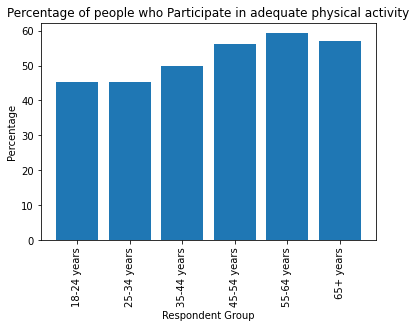

In [58]:
#age
create_barchart(0, data_age)

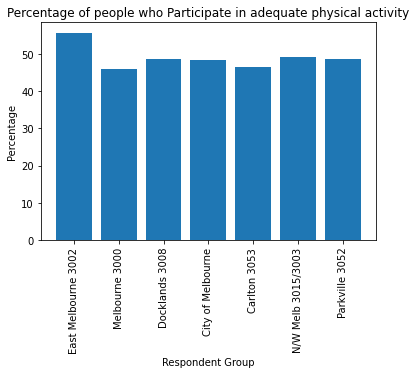

In [59]:
#area
create_barchart(0, data_area)

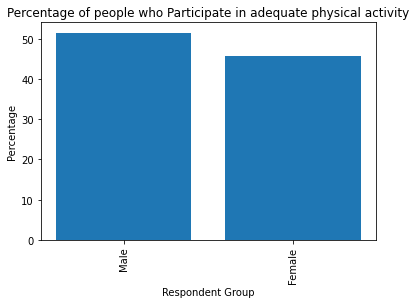

In [60]:
#gender
create_barchart(0, data_gender)

In [61]:
#side by side demographic comparison
def demographic_comparison_barchart(num, df1, df2, df3):
    x_b = df1[df1['DESCRIPTION'] == common_list[num]]['RESPONDENT GROUP'].tolist()
    y_b = df1[df1['DESCRIPTION'] == common_list[num]]['RESULT'].tolist()
    x_b_2 = df2[df2['DESCRIPTION'] == common_list[num]]['RESPONDENT GROUP'].tolist()
    y_b_2 = df2[df2['DESCRIPTION'] == common_list[num]]['RESULT'].tolist()
    x_b_3 = df3[df3['DESCRIPTION'] == common_list[num]]['RESPONDENT GROUP'].tolist()
    y_b_3 = df3[df3['DESCRIPTION'] == common_list[num]]['RESULT'].tolist()
    
    fig, axs = plt.subplots(1, 3, figsize = (15,5))
    if average_or_percentage[num] == 'Percentage':
        fig.suptitle('Percentage of people who ' + common_list[num], fontsize=16, y=1, x=0.5)
    if average_or_percentage[num] == 'Average (out of 100)':
        fig.suptitle('Average score for ' + common_list[num], fontsize=16, y=1, x=0.5)
    
    axs[0].bar(x_b, y_b)
    axs[0].set_xlabel('Respondent Group')
    axs[0].set_ylabel(average_or_percentage[num])
    axs[0].tick_params(axis='x', rotation=90)
    
    axs[1].bar(x_b_2, y_b_2)
    axs[1].set_xlabel('Respondent Group')
    axs[1].set_ylabel(average_or_percentage[num])
    axs[1].tick_params(axis='x', rotation=90)
    
    axs[2].bar(x_b_3, y_b_3)
    axs[2].set_xlabel('Respondent Group')
    axs[2].set_ylabel(average_or_percentage[num])
    axs[2].tick_params(axis='x', rotation=90)

    plt.show()

Button(description='Create Graphs', style=ButtonStyle())

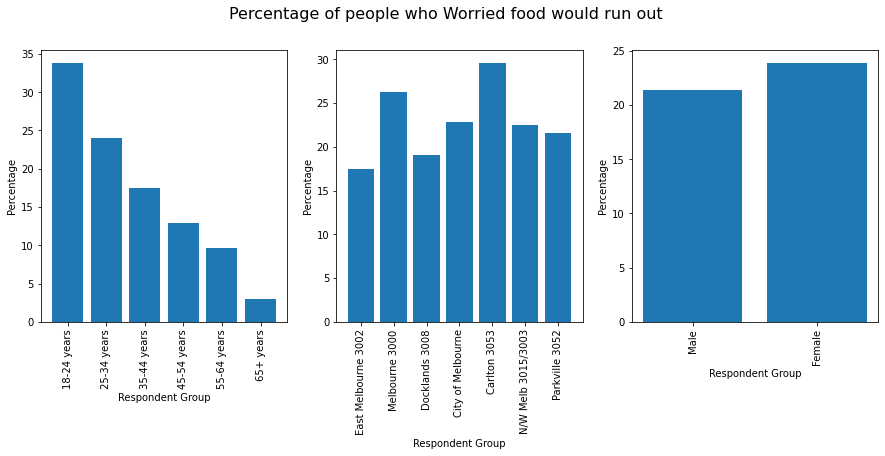

In [62]:
#Widget logic
def on_button_click(a):
    plot_input = common_list.index(dropdown_options.value)
    demographic_comparison_barchart(plot_input, data_age, data_area, data_gender)

button = widgets.Button(description="Create Graphs")
button.on_click(on_button_click)

display(widgets.HBox([dropdown_options]))
display(button)